# LAB 1. Знакомство с Jupyter Notebook

## Useful imports

In [33]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import HTML, display
from collections import defaultdict
from typing import List

## Reading datasets

In [34]:
def mean(values: List[float | int]):
    if not values:
        return None

    return sum([key * value / len(values) for key, value in Counter(values).items()])

def variance(values: List[float | int]):
    
    return math.sqrt(mean([s ** 2 for s in values]) - mean(values) ** 2)

In [35]:
data_sets_files = ["set_1.csv", "set_2.csv", "set_3.csv"]

def remove_spreads(data: list[int | float]) -> list[int | float]:
    sigma: float = variance(data)

    return list(filter(lambda x: -3 * sigma < x and x < 3 * sigma, data))

data_sets = [remove_spreads(pd.read_csv(filename, header=None).values.flatten().tolist()) for filename in data_sets_files]


## Universal function for creating histograms for datasets

In [36]:
def plotting_dataset(dataset: List[float] | List[int], bins_count: int, data_percent: float):
    
    N = len(dataset)
    n = math.ceil(1 + 1.14 * math.log(N))
    
    min_val = min(dataset)
    max_val = max(dataset)
    
    step = (max_val - min_val) / n

    intervals = defaultdict(int)
    
    for val in dataset:
        index = math.ceil((val - min_val) / step)
        intervals[index] += 1

    keys = sorted(intervals.keys())
    intervals = {key: intervals[key] for key in sorted(intervals)}
    
    for val in keys:
        if intervals[val] / N < data_percent:
            intervals.pop(val)

    keys = sorted(intervals.keys())

    max_val = keys[len(keys) - 1] * step + min_val
    min_val = keys[0] * step + min_val

    plt.hist([val for val in dataset if val <= max_val and val >= min_val], bins=bins_count, color="red", edgecolor="black", linewidth=1.2)

    plt.title("Гистограмма")
    plt.xlabel("Значения")
    plt.ylabel("Частота")

    plt.show()


### Plotting dataset 1

15 1 9 0.5333333333333333


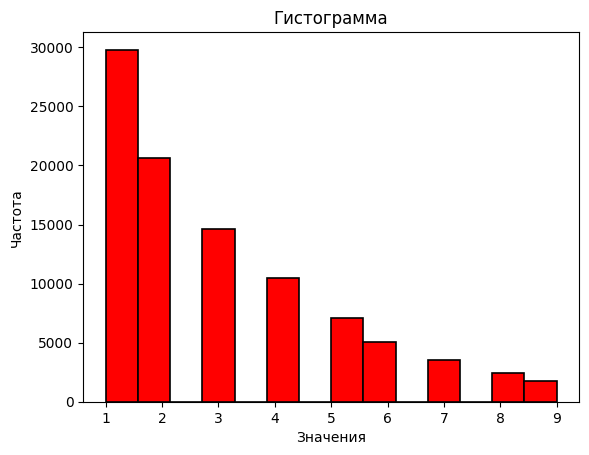

In [37]:
plotting_dataset(data_sets[0], 14, 0.01)

### Plotting dataset 2

12 -310.324803 311.559268 51.82367258333333


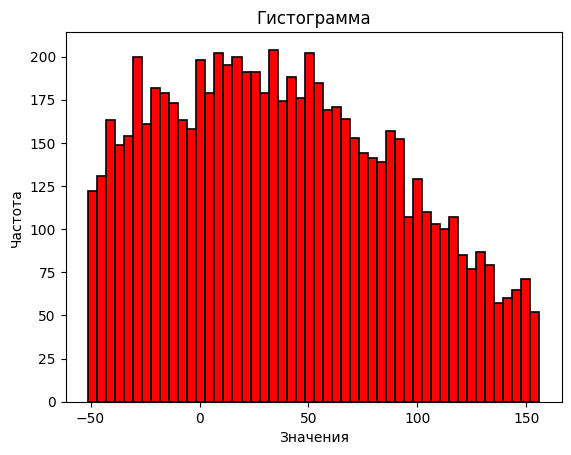

In [38]:
plotting_dataset(data_sets[1], 50, 0.1)

### Plotting dataset 3

15 -0.477736 0.480401 0.0638758


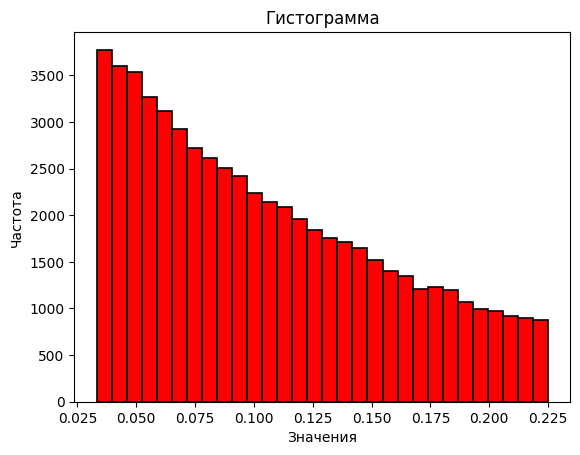

In [39]:
plotting_dataset(data_sets[2], 30, 0.1)

In [41]:
means = [mean(data_set) for data_set in data_sets]

variances = [variance(data_set) for data_set in data_sets]

table = f"""<table>
<tr>
<th></th>
{[f"<th>{header}</th>" for header in data_sets_files]}
</tr>
<tr>
<td>Mean</td>
{[f"<td>{mean}</td>" for mean in means]}
</tr>
<tr>
<td>Variance</td>
{[f"<td>{variance}</td>" for variance in variances]}
</tr>
</table>"""

display(HTML(table))

,set_1.csv,set_2.csv,set_3.csv
Mean,2.961636828644501,20.083021469520308,0.11399351838477945
Variance,2.0580787483948093,86.15804160739974,0.1022158961292605


In [42]:
def geometric_distribution(mean: float, variance: float, size: int):
    while mean < 1:
        mean *= 10
    p = 1 / mean

    sample = np.random.geometric(p, size)

    # sample_mean = np.mean(sample)
    # sample_variance = np.var(sample)
    # sample = (sample - sample_mean) * np.sqrt(variance / sample_variance) + mean

    return sample

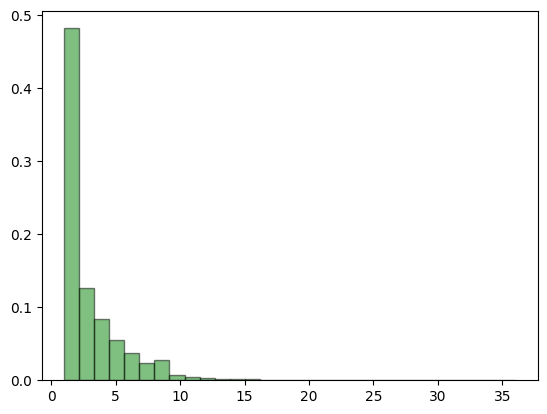

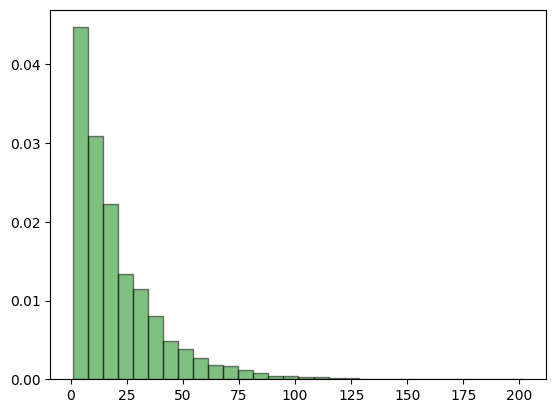

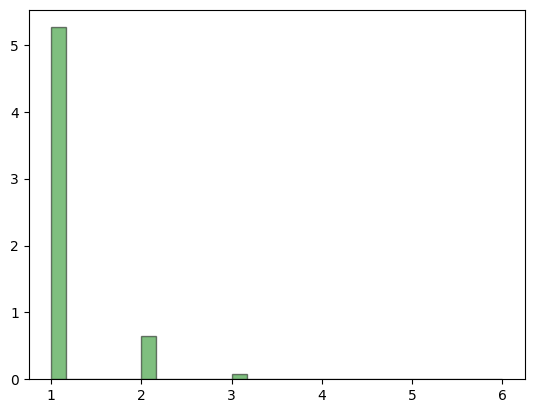

In [43]:
for mean, variance, data_set in zip(means, variances, data_sets):
    sample = geometric_distribution(mean, variance, len(data_set))
    plt.hist(sample, bins=30, density=True, alpha=0.5, color='g', edgecolor='black')
    plt.show()


In [44]:
def binomial_distribution(mean, variance, size):
    while variance < 1:
        variance *= 10

    p = 1 - mean / variance
    print(p)
    n = mean**2 / (variance - mean)

    sample = np.random.binomial(n, p, size)

    return sample

In [45]:
for mean, variance, data_set in zip(means, variances, data_sets):
    sample = binomial_distribution(mean, variance, len(data_set))
    plt.hist(sample, bins=30, density=True, alpha=0.5, color='g', edgecolor='black')
    plt.show()

-0.43902988695375167


ValueError: p < 0, p > 1 or p is NaN

In [46]:
def exponential(mean: float, n: int) -> list[float]:
    return [random.expovariate(1 / mean) for _ in range(n)]

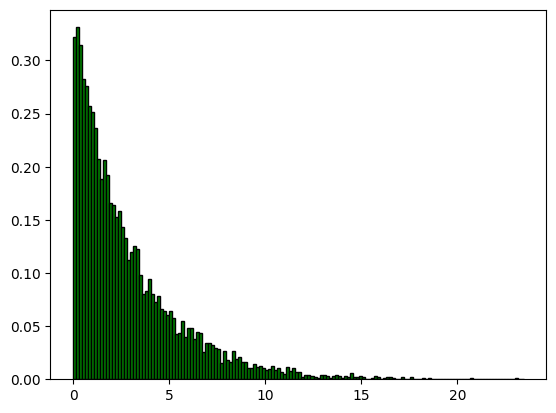

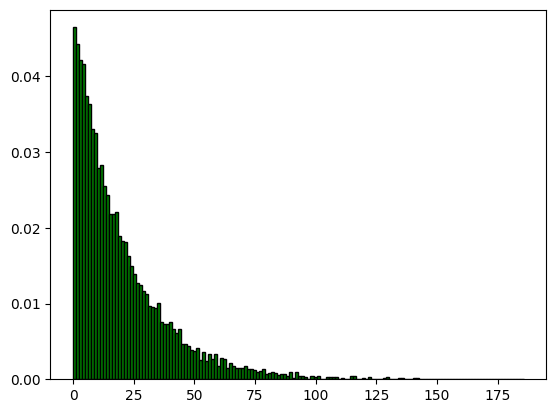

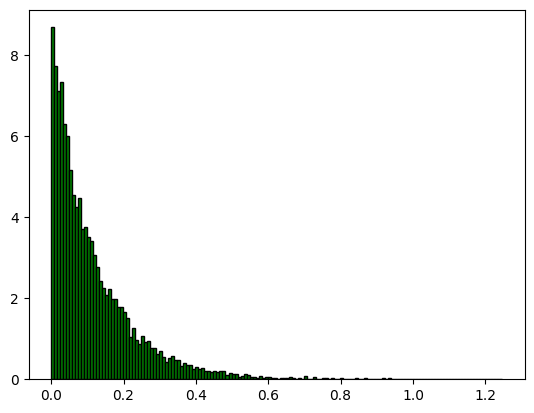

In [47]:
for mean, variance, data_set in zip(means, variances, data_sets):
    sample = exponential(mean, 10000)
    plt.hist(sample, bins=150, density=True, color='g', edgecolor='black')
    plt.show()

In [48]:
def normal(mean: float, var: float, size: int):
    data = np.random.normal(mean, var, size)

    plt.hist(data, bins=50, density=True, alpha=0.7, color='blue')

    x = np.linspace(mean - 4*var, mean + 4*var, 100)
    y = np.exp(-(x - mean)**2 / (2 * var**2)) / (var * np.sqrt(2 * np.pi))
    plt.plot(x, y, color='red')

    plt.xlabel('Значение')
    plt.ylabel('Плотность вероятности')
    plt.title('Нормальное распределение')

    plt.show()

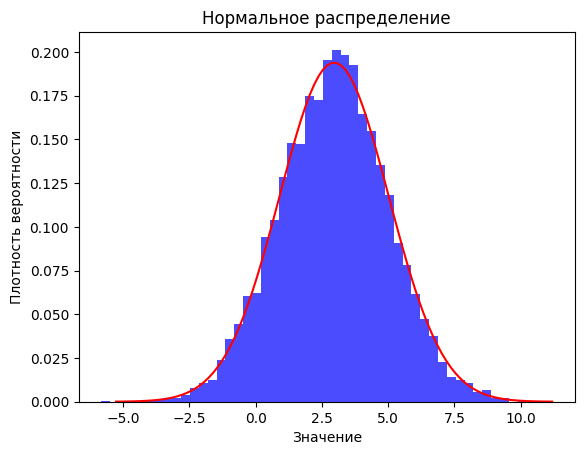

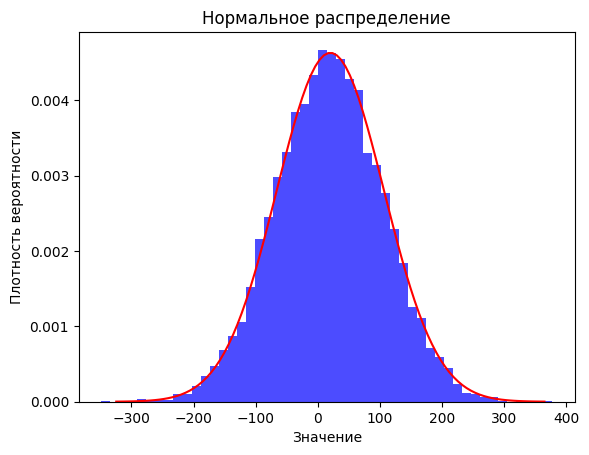

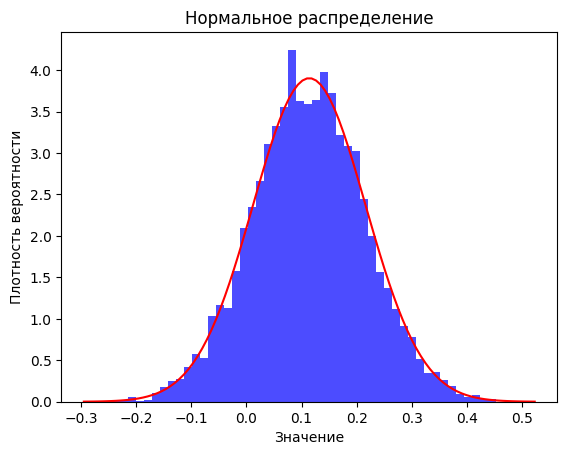

In [49]:
for mean, variance, data_set in zip(means, variances, data_sets):
    sample = normal(mean, variance, 10000)